
# Mini-Projet TP 1 :  Détection d'activités à partir de caractéristiques extraites d'accéléromètre 

## Nom du binôme :

Dans ce projet, vous prédirez 5 différentes activités humaines en utilisant des méthodes supervisées :

 **2-Assis,3-Debout, 5-Velo, 6-Marche Nordique, 8-Repassage**

en utilisant le capteur d'accéléromètre placé à deux endroits différents du corps :  poignet et cheville.

Pour réaliser cette classification, nous disposons de profils temporels des signaux extraits d'accéléromètre. 
les mesures respectivement en $ms^{-2}$ sont prélevées sur les 3-axes à une fréquence d'échantillonnage de 100Hz. 
Les profils temporels comportent 128 pas de temps et chaque mesure est étiquetée.

<img src="./HARDataset.JPG" width="800" height="600"  >


Vous disposez des matrices suivantes
-  **X_train_Cheville_TP1.npy** et **X_test_Cheville_TP1.npy** deux matrices d'apprentissage et de test de dimensions 384 (concatenation des signaux de 128 pas de temps sur les 3 axes X, Y et Z) du capteur d'accéléromètre situé sur la cheville.
-  **LabelTrain_TP1.npy** et **LabelTest_TP1.npy** les vecteurs respectifs des labels pour la base d'apprentissage et de test dont le numéro correspond à une des 5 activités présentées ci-dessus.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats
import sklearn

# Chargement des données 

In [10]:
# CAPTEUR CHEVILLE 
Xtrain_Cheville=np.load('./Xtrain_Cheville_TP1.npy')
print('Taille de la base d apprentissage :', Xtrain_Cheville.shape)

# Chargement des données de test
Xtest_Cheville=np.load('./Xtest_Cheville_TP1.npy')
print('Taille de la base de test :', Xtest_Cheville.shape)

# LABELS : 
y_train=np.load('./LabelTrain_TP1.npy')
y_test=np.load('./LabelTest_TP1.npy')
print('Taille label apprentissage :',y_train.shape, 'Taille label test :',y_test.shape)

Taille de la base d apprentissage : (5791, 384)
Taille de la base de test : (2483, 384)
Taille label apprentissage : (5791,) Taille label test : (2483,)


In [11]:
print("Premier exemple :", Xtrain_Cheville[0][:10]) # Affiche les 10 premières valeurs
print("\nLabel du premier exemple :", y_train[0])
print("\nLabel du premier exemple :", y_train[1])
print("\nLabel du premier exemple :", y_train[2])
print("\nLabel du premier exemple :", y_train[3])

Premier exemple : [9.54557037 9.62442017 9.58150005 9.39216995 9.47212982 9.61892033
 9.46772003 9.39818001 9.43620014 9.54716969]

Label du premier exemple : 2

Label du premier exemple : 2

Label du premier exemple : 5

Label du premier exemple : 6


On peut voir que le train du dataset est composé de deux parties :
La partie Xtrain_Cheville_TP1.npy et la partie LabelTrain_TP1.npy.
Xtrain va contenir toutes les mesures sans le résultat / la correction.
LE résultat avérré se situe dans le LabelTrain. Ainsi, Xtrain va être confronté au résultat attendu et va apprendre de ses erreurs (dans le cas du supervisé
)

### Fonctions pour réaliser une table de correspondance entre le label des approches non supervisées et le label réel

In [12]:
def retrieve_info(cluster_labels,y_train):
 #Associe l'étiquette la plus probable à chaque groupe dans le modèle KMeans.
 #Résultats : dictionnaire des clusters associés à chaque étiquette.

# Initialisation
  reference_labels = np.zeros((len(np.unique(cluster_labels)),1))
# Loop pour chaque label 
  for i in range(len(np.unique(cluster_labels))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

def correspondance(y_pred,label):
  # Correspondance entre la partition du clusterin y_pred et les classes de la vérité terrain label
  reference_labels = retrieve_info(y_pred,label)
  number_labels = np.zeros(len(y_pred))
  for i in range(len(y_pred)):
    number_labels[i] = reference_labels[y_pred[i]]
  return number_labels


# Partie I : Classification des activités sans prétraitement

Réaliser une classification des activités par deux méthodes d'apprentissage supervisé  de votre choix en utilisant les codes des TP précédents.


## Méthodes supervisées  : 
Indiquer quelle est la méthode supervisée et les paramètres utilisées.  Calculer la matrice de confusion associée, le pourcentage de bonne classification et commentez les résultats.


### Gaussian Naive Bayes
Comme dans le cours avec les poissons (saumon vs bar), on va essayer de représenter les valeurs des capteurs sous forme d'histogramme pour trouver des patterns notamment la vraissemblance donc, qui est la probabilité d'avoir une valeur pour tous les capteurs (X) sachant que l'activité physique Y. On prend naïvement toutes les mesures des capteurs (peu importe lesquels) pour chaque activité et on trace l'histogramme puis la fonction de densité de probabilité qui suit l'histogramme. 

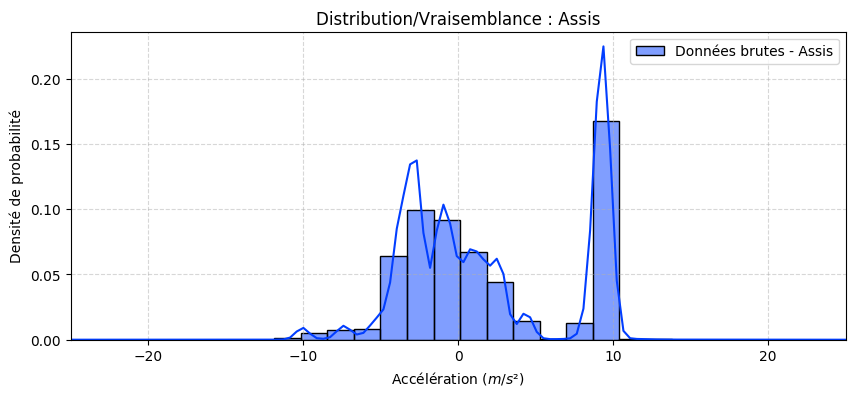

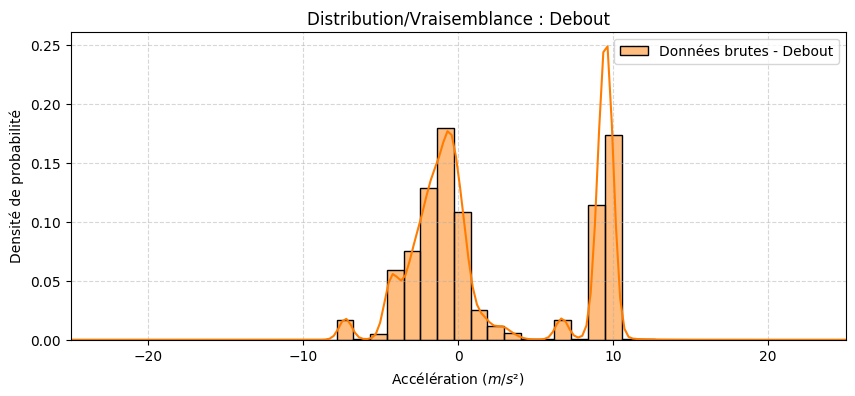

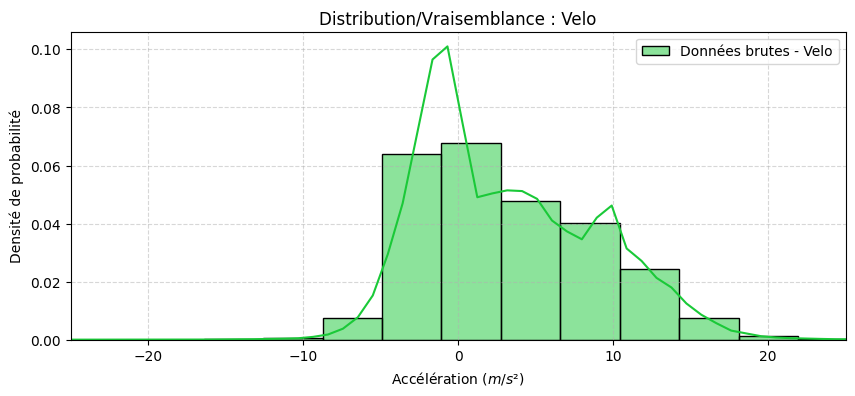

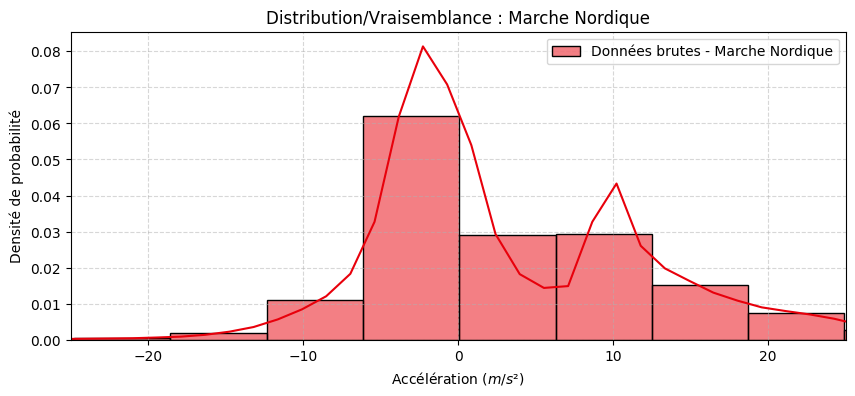

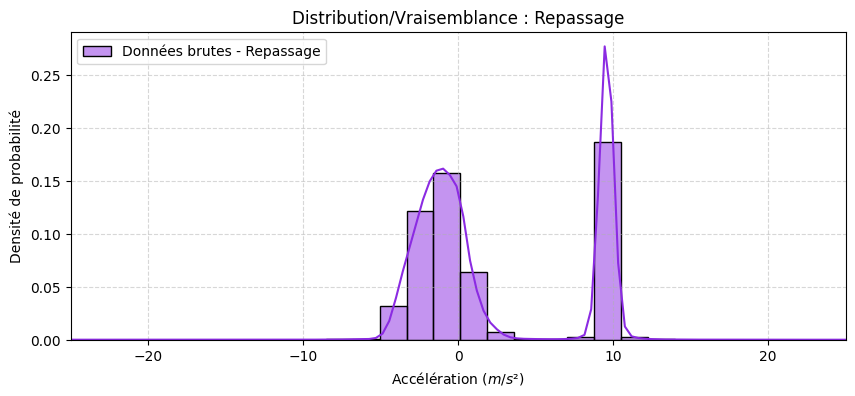

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def afficher_vraisemblance_activite(X, y, activite_id, nom_activite, couleur):
    plt.figure(figsize=(10, 4))
    
    # Extraction des données pour l'activité concernée
    data_activite = X[y == activite_id].flatten()
    
    # On trace l'histplot (en activant la courbe de densité qui suit l´histplot)
    sns.histplot(data_activite, 
                 color=couleur, 
                 kde=True,
                 stat="density",
                 bins=50,
                 label=f"Données brutes - {nom_activite}")
    
    plt.title(f"Distribution/Vraisemblance : {nom_activite}")
    plt.xlabel("Accélération ($m/s²$)")
    plt.ylabel("Densité de probabilité")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xlim(-25, 25) 
    plt.show()


couleurs = sns.color_palette("bright", 5)
afficher_vraisemblance_activite(Xtrain_Cheville, y_train, 2, "Assis", couleurs[0])
afficher_vraisemblance_activite(Xtrain_Cheville, y_train, 3, "Debout", couleurs[1])
afficher_vraisemblance_activite(Xtrain_Cheville, y_train, 5, "Velo", couleurs[2])
afficher_vraisemblance_activite(Xtrain_Cheville, y_train, 6, "Marche Nordique", couleurs[3])
afficher_vraisemblance_activite(Xtrain_Cheville, y_train, 8, "Repassage", couleurs[4])

### Observations
On voit bien des pics se dessiner que l'on pourrait donc approximer par des fonctions de Gauss. 
Sauf qu´il y a un problème : Le nombre de pics.
En effet, que ça soit pour le repassage, être assis et être debout, on a 2 pics qui se dessinent, ce qui est dérangeant car dans notre cours, nous avons vu que la classification bayésenne marche bien notamment si la densité empirique est unimodale (un seul pic donc). 
Dans notre cas on aura, si on essaye d'estimer les paramètres d'une gaussienne, on aura une moyenne des deux pics comme sur le schéma ci-dessous (en rouge), ce qui va certainement fausser l'aprentissage du modèle et sa précision future.

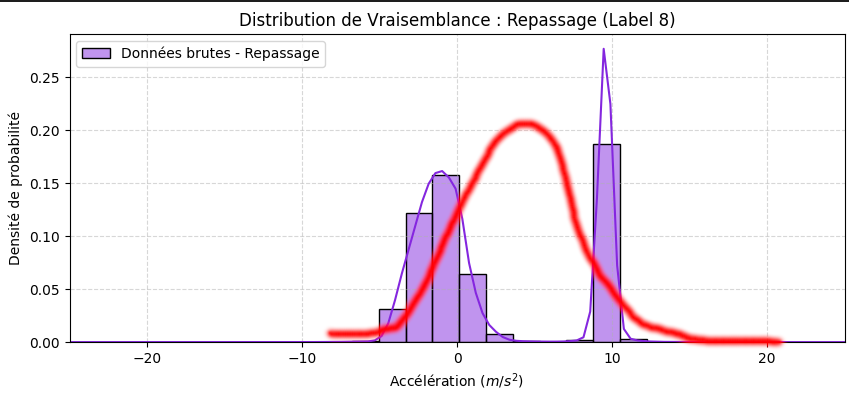

### Raffiner la vraissemblance des activités
Avant de tester l'apprentissage pour vérifier notre hypothèse. Essayons de raffiner un peu notre histogramme pour distinguer les différents axes dans les valeurs afin d'avoir une meilleure vision de nos données et de vérifier par la même occasion qu'elles sont cohérentes.


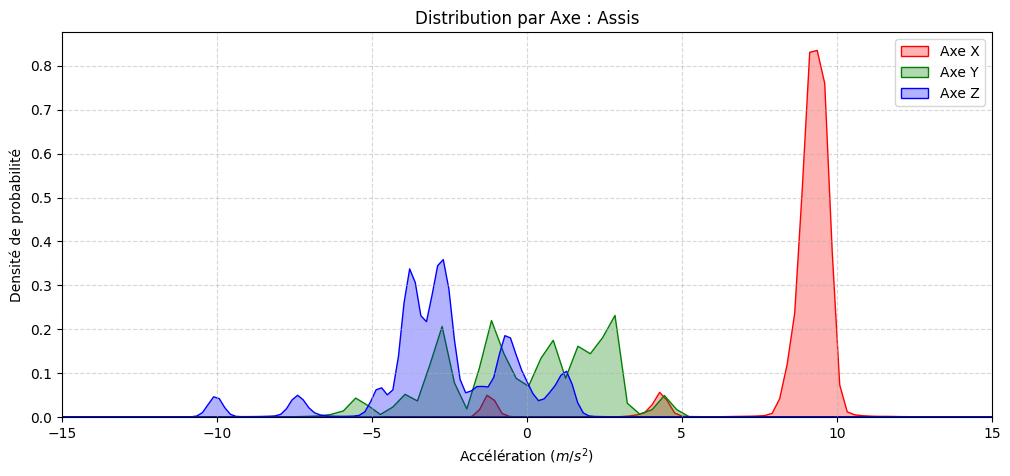

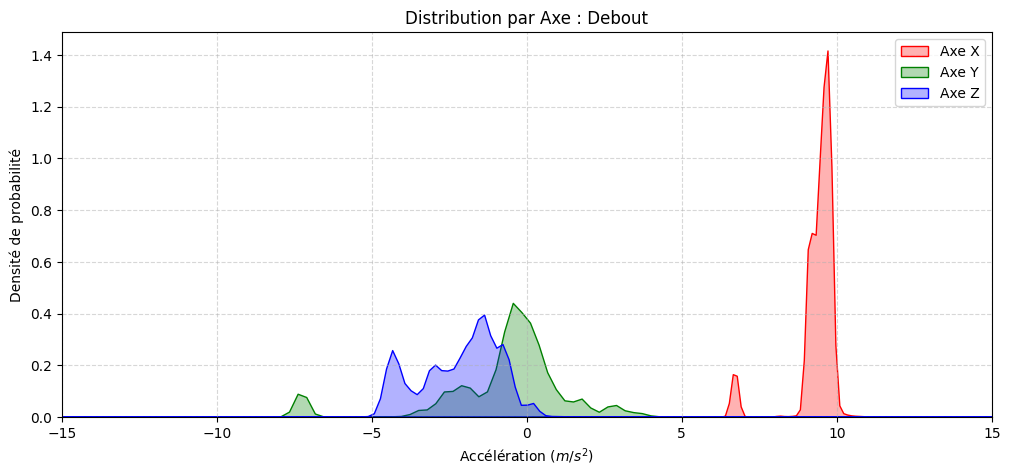

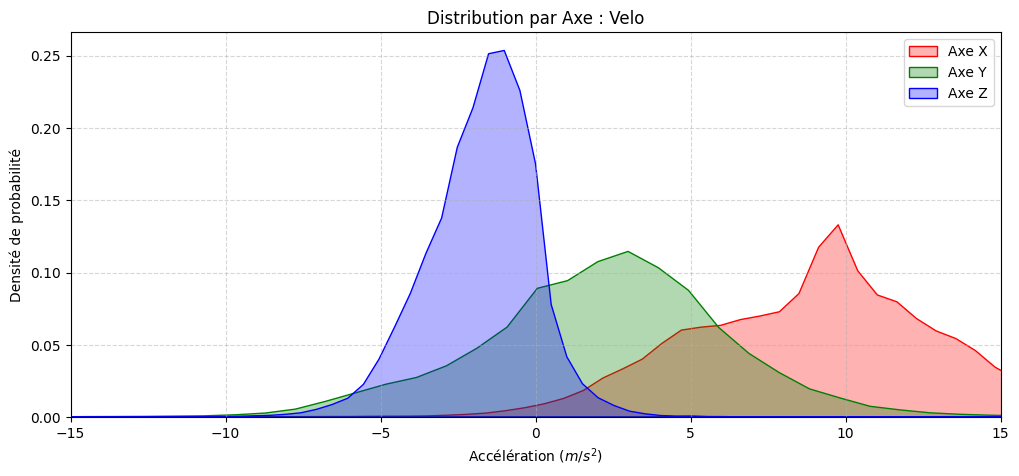

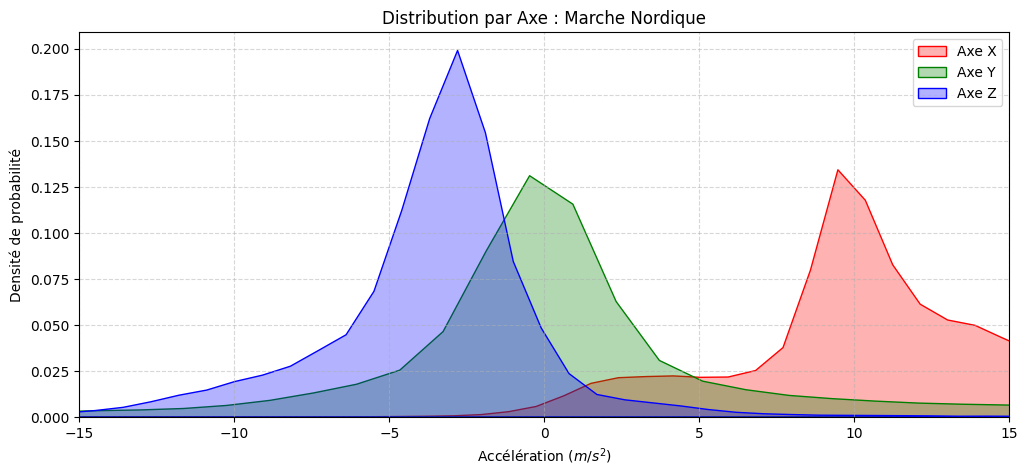

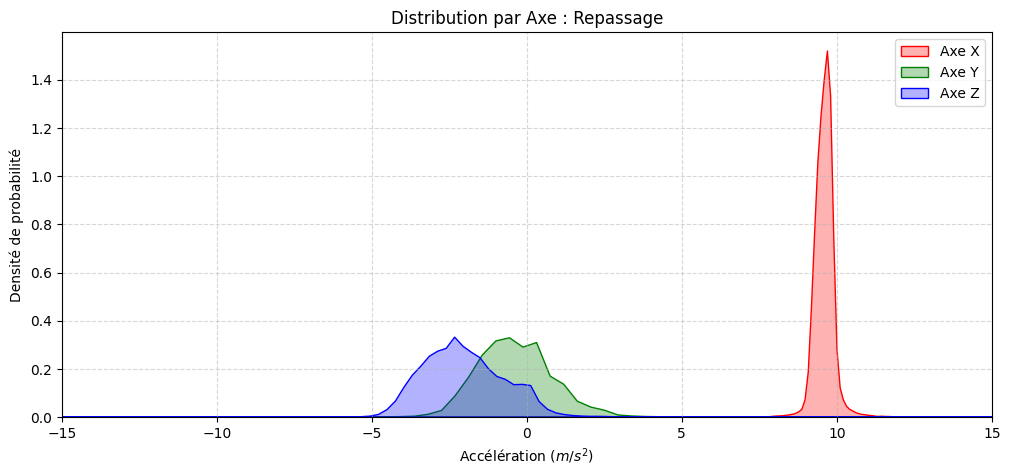

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def afficher_vraissemblances_par_axe(X, y, activite_id, nom_activite):
    data = X[y == activite_id]
    
    # On distingue les mesures de chaque capteur en fonction de leur axe (X, Y, Z). 
    # Comme dit dans l'énoncé, les 384 mesures sont organisées en 3 blocs de 128 mesures chacun pour chaque axe.
    data_x = data[:, 0:128].flatten()
    data_y = data[:, 128:256].flatten()
    data_z = data[:, 256:384].flatten()
    
    plt.figure(figsize=(12, 5))
    
    sns.kdeplot(data_x, label='Axe X', fill=True, color='red', alpha=0.3)
    sns.kdeplot(data_y, label='Axe Y', fill=True, color='green', alpha=0.3)
    sns.kdeplot(data_z, label='Axe Z', fill=True, color='blue', alpha=0.3)
    
    plt.title(f"Distribution par Axe : {nom_activite}")
    plt.xlabel("Accélération ($m/s²$)")
    plt.ylabel("Densité de probabilité")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xlim(-15, 15)
    plt.show()

afficher_vraissemblances_par_axe(Xtrain_Cheville, y_train, 2, "Assis")
afficher_vraissemblances_par_axe(Xtrain_Cheville, y_train, 3, "Debout")
afficher_vraissemblances_par_axe(Xtrain_Cheville, y_train, 5, "Velo")
afficher_vraissemblances_par_axe(Xtrain_Cheville, y_train, 6, "Marche Nordique")
afficher_vraissemblances_par_axe(Xtrain_Cheville, y_train, 8, "Repassage")
 

### Observations
- Pour les activités comme Assis, Debout et le repassage, les données sont selon moi plutôt cohérentes avec la physique basique que l'on m'a enseigné. En effet, à l'arrêt, on a bien la force gravitationnelle qui s'exerce sur nous. La cheville n'y échappe pas, d'où l'accélération à 9.81 m-s² représenté sur l'axe X de notre histogramme.
- Pour le vélo, nos pieds étant sur les pédales donc suivant le mouvement circulaire du pédalier.
    - On peut imaginer X être l'accélération du haut/bas (axe vertical du pédalier) car pic à 9.81 m-s² comme dit précédemment
    - On peut imaginer Z être l'accélération d'avant en arrière car la densité est très étalée (pas de champ gravitationnel sur cet axe et pied qui va aussi bien en avant qu'en arrière)
    - On peut imaginer Y être le déplacement latéral sur la pédale qui théoriquement ne varie pas ou très peu lorsque l'on pédale une fois le pied placé sur la pédale, d'où le pic proche de 0 m-s² (et aussi après élimination de la courbe verte)
- On peut appliquer le même raisonnement que le vélo pour la marche nordique. On est censé marcher droit pas latéralement et nous sommes aussi soumis au champ gravitationnel.

## Apprentissage Bayésien

In [ ]:
# A compléter


### Critère pour évaluer la méthode :

In [ ]:
from sklearn.metrics import confusion_matrix

# Calcul de la matrice de confusion

#confusion_matrix(y_true, y_pred)

# Calcul du pourcentage de bonne classification

## Méthode non supervisée

indiquer quelle est la méthode non supervisée de votre choix et calculer la matrice de confusion associée. 

In [ ]:
# A compléter

In [ ]:
# Calcul de la matrice de confusion et du pourcentage de bonne classification

## Commentaires sur les méthodes supervisées utilisées et les résultats suivant les capteurs :

A COMPLETER

# Partie II : Classification des activités avec prétraitement

- Réalisez maintenant une réduction de dimension par ACP. Expliquez quelle est la dimension la + intéressante.
- Appliquez les mêmes méthodes supervisées réalisées en TP et commentez les paramètres choisis. 
- Commentez les résultats. 

## Réduction de dimension par Analyse en Composantes Principales (ACP)

Réaliser une ACP pour réduire la dimension et visualiser les données. Discuter sur le choix de la dimension.

In [ ]:
# A compléter

##  méthode supervisée avec réduction de dimension par ACP sur l'ensemble d'apprentissage
Après avoir réalisé une ACP sur l'ensemble d'apprentissage pour réduire la dimension 
puis projeter les données de l'ensemble de test dans la base de l'ACP, appliquez les deux méthodes supervisées. 



In [ ]:
# A compléter 

In [ ]:
# Calcul de la matrice de confusion et du pourcentage de bonne classification

## Méthodes non supervisées avec réduction de dimension par ACP sur l'ensemble d'apprentissage
Après avoir réalisé une ACP sur l'ensemble d'apprentissage pour réduire la dimension puis projeter les données de l'ensemble de test dans la base de l'ACP, appliquez les deux méthodes supervisées. 


In [ ]:
# A compléter 

In [ ]:
# Calcul de la matrice de confusion et du pourcentage de bonne classification

## Commentaires sur les méthodes supervisée et non supevisée utilisées et les résultats

A COMPLETER

# Bilan de l'analyse 

A COMPLETER